# K Nearest Neighbors Project 

Welcome to the KNN Project! In this project we'll use a K Nearest Neighbors model to perform a task classification (to maintain anonimity, the dataset will be a set artificial data). 

After making the first predicitons, we'll use the *elbow method* to perform hyperparameter tuning on the *K* value, trying to improve the KNN performance.

## Import Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cuff
import plotly.graph_objects as go
import plotly.express as px

sns.set_theme()
%matplotlib inline

## Get the Data

In [3]:
df = pd.read_csv('data/KNN_Project_Data')

Let's check the *head* of the dataframe, to give us an idea of what kind of data we're going to work with.

In [4]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

## EDA

Since this data is artificial, as EDA we'll just do a large pairplot with seaborn. We'll differentiate the datapoint based on the target column.

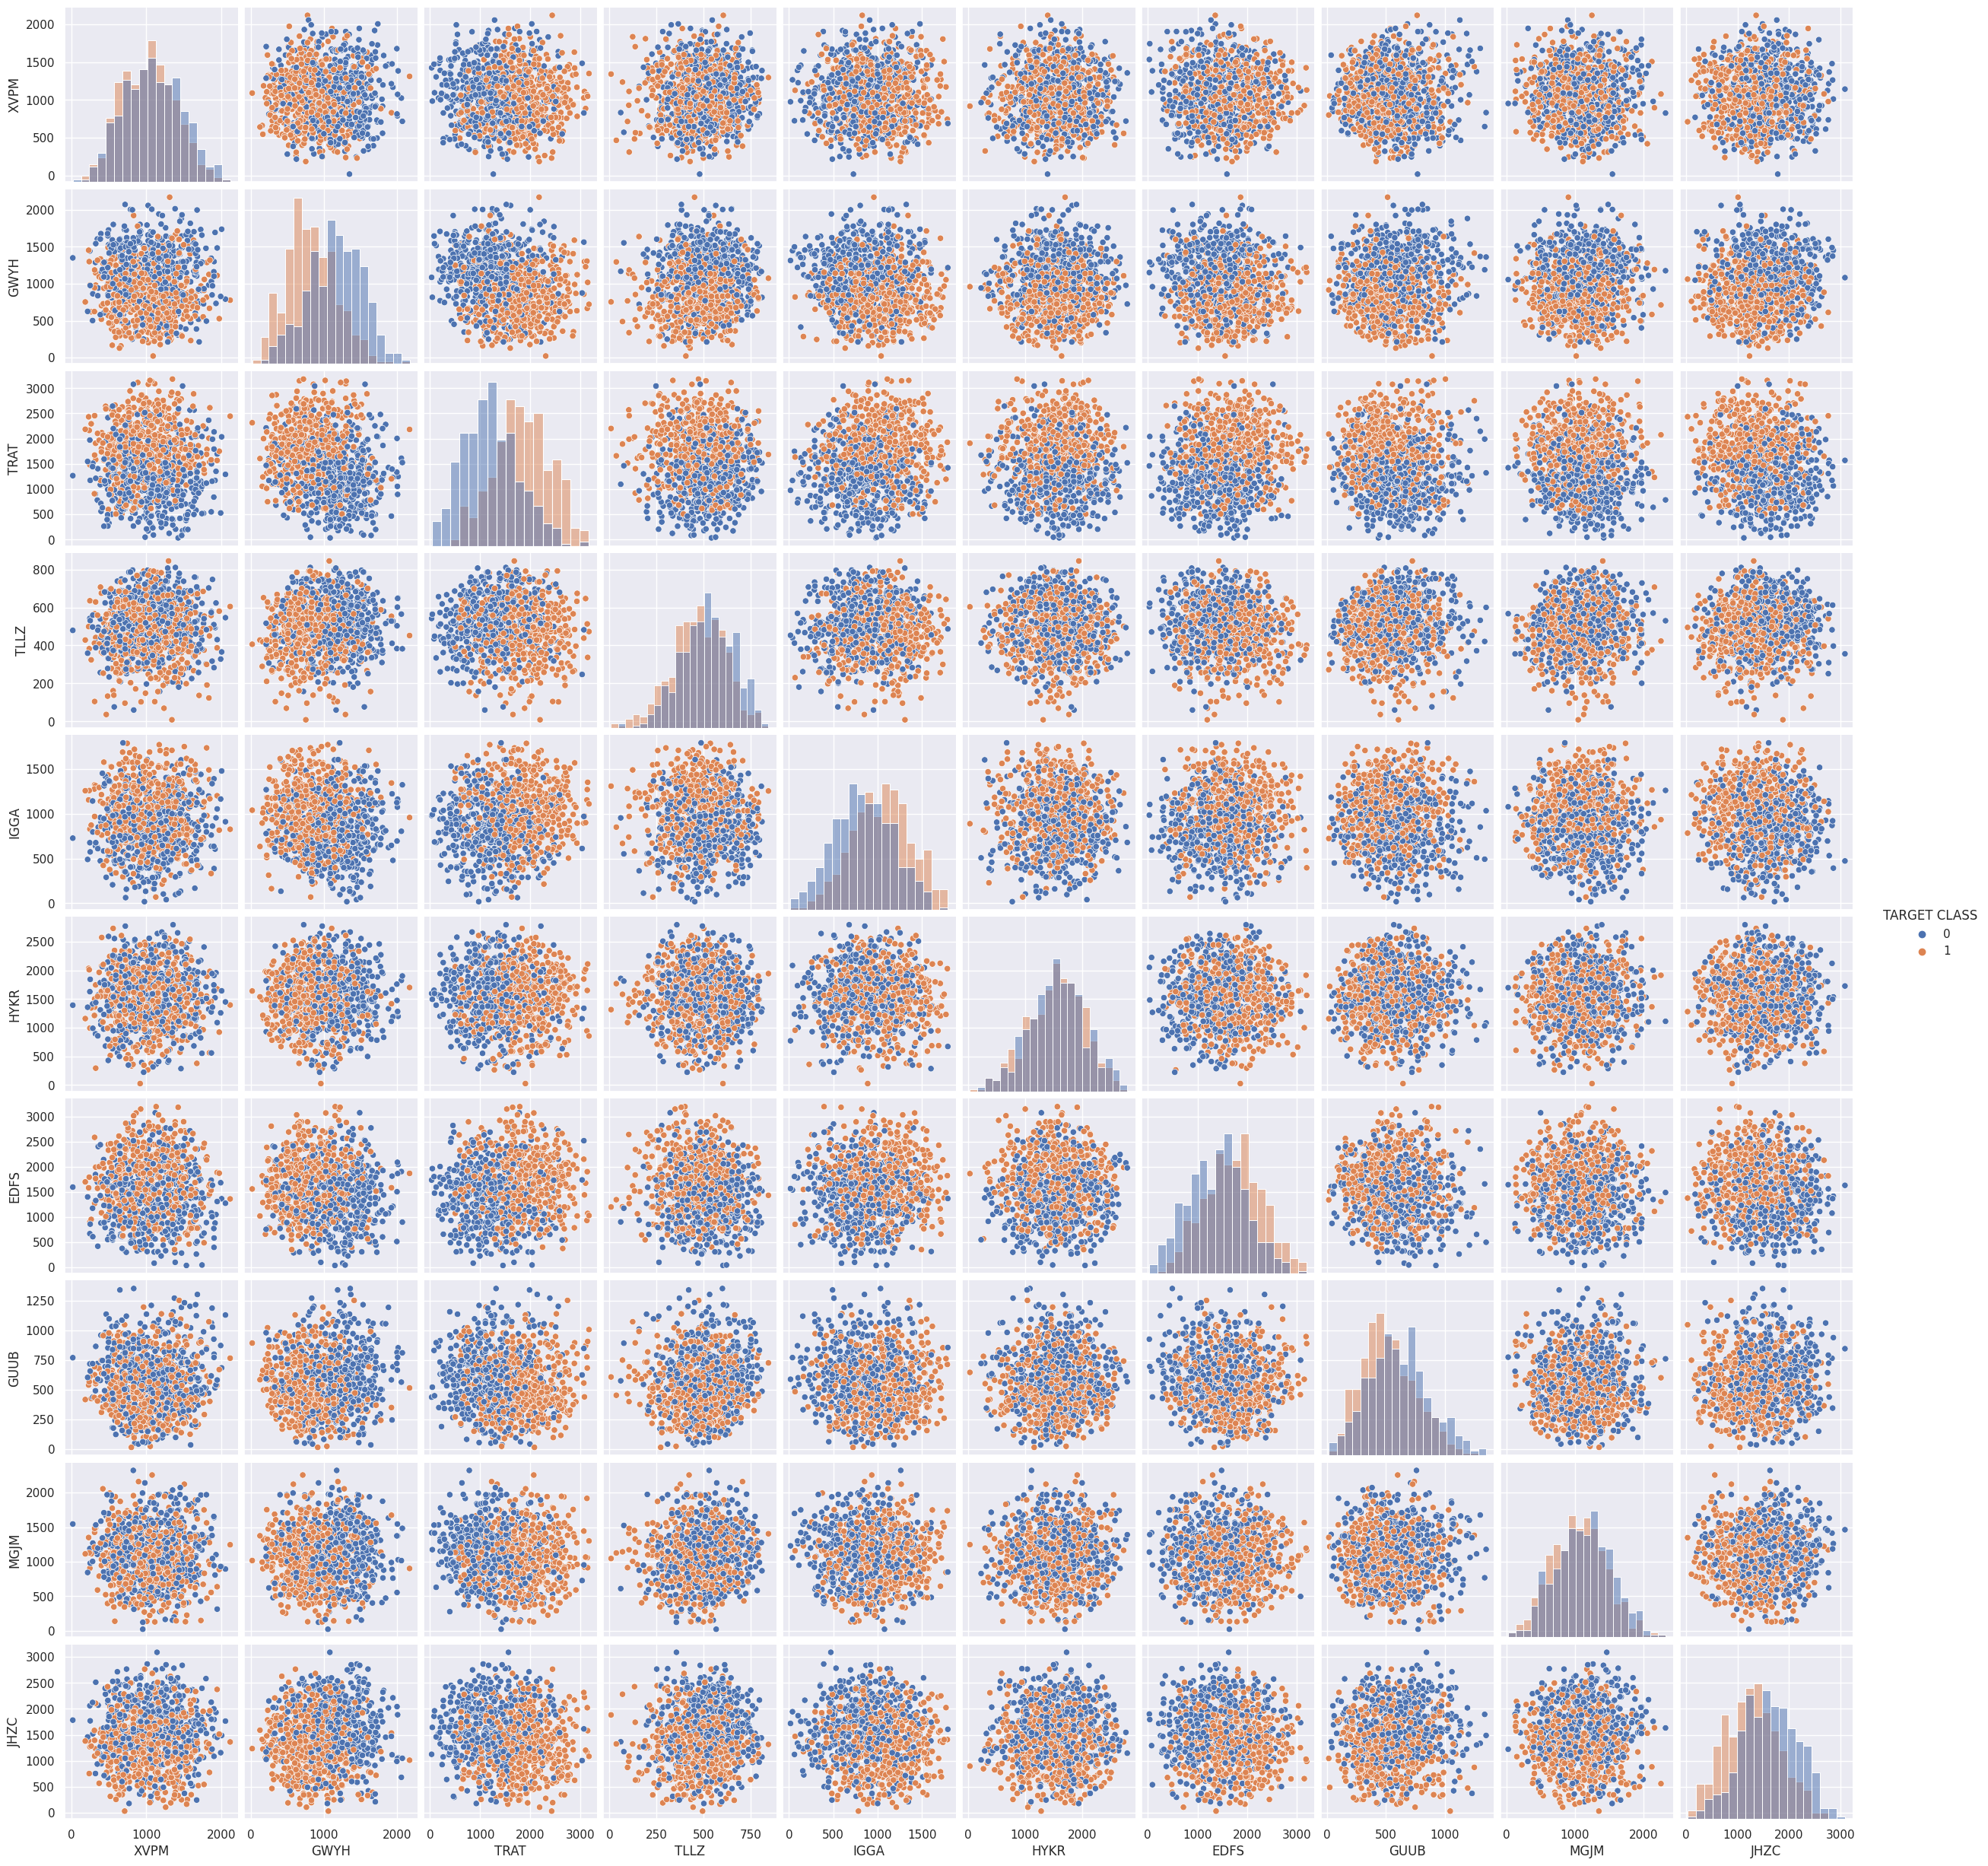

In [5]:
sns.pairplot(df, hue='TARGET CLASS', diag_kind='hist')

## The model

### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('TARGET CLASS', axis=1), df['TARGET CLASS'], test_size=.3)

### Standardize the Variables

Time to standardize the variables. Making sure all the features are on the same scale is fundamental for KNN, since as a distance-based model it has high sensitivity on columns with larger values. 

The reason we do this after the train/test split is to prevent data leakage: a test data transformation shhould always be based on a transformation did on the train dataset.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Let's check down below the features scaled:

In [10]:
# for training data
pd.DataFrame(X_train, columns=df.columns.drop('TARGET CLASS')).head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.354725  1.219489  0.208840  0.944839  0.533441  0.975900  0.789589   
1 -0.766682 -1.669771  1.416901 -0.482187  0.660379 -0.119306 -0.606109   
2  0.789870 -0.175524 -0.560700 -1.954147 -1.101254 -1.071127 -1.174807   
3 -0.092073  0.115895 -0.882139 -0.330431 -0.689171  1.774529 -1.262891   
4  0.119733  0.728612 -0.202649 -1.176562 -0.769265 -1.403125 -0.195368   

       GUUB      MGJM      JHZC  
0 -0.987104  1.848425 -0.101934  
1  0.063791 -1.216528 -0.672645  
2 -1.002291 -1.250814  0.560352  
3 -0.883046 -0.510765 -0.840890  
4 -1.638633 -1.669177  0.338106

In [11]:
# for rest data
pd.DataFrame(X_test, columns=df.columns.drop('TARGET CLASS')).head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0 -0.465212  2.001317  1.508875 -0.397588 -0.820881  1.051308 -0.070878   
1 -1.033417 -1.058241  1.330568  0.809592 -0.091765  0.533471  0.307756   
2 -1.784490  1.573283 -0.525216  0.329400  0.044068 -0.439568  1.417091   
3  0.612313 -1.985851  1.084232  0.174943 -0.467598  0.565279 -1.335075   
4  1.137288  0.523605 -2.171206  0.074761  0.678651  0.031650 -0.709963   

       GUUB      MGJM      JHZC  
0 -1.112110  0.552646  0.894635  
1  0.877908 -1.264486 -0.711039  
2 -0.546691  0.238705 -0.553046  
3  1.721557 -0.036303 -0.481963  
4 -0.891640 -0.327499 -0.006187

### Using KNN

Time to focus on the model now! We'll import it from the sklearn library.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

As a first test, we create KNN model instance with 1 neighbor.

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

Let's now fit the train data to train the model.

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Predictions and Evaluations

Let's evaluate our KNN model!

This starting from doing prediction...

In [15]:
preds = knn.predict(X_test)

...and then seeing the classificiation result on a confusion matrix and classification report.

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
print(confusion_matrix(y_test, preds))

[[113  41]
 [ 38 108]]


In [18]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       154
           1       0.72      0.74      0.73       146

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



### Hyper-parameter tuning

The previous results are not bad, but now let's see if we can improve it: we'll use the elbow method to pick a good K Value.

As a first step what we are going to do is training various KNN models with different *K* values, keeping track of the *error_rate* for each of these models with a list.

In [19]:
error_rate = []

for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  preds_i = knn.predict(X_test)
  error_rate.append(np.mean(preds_i != y_test))

We now plot all the error rates obtained, to see graphically which *K* value minimize the error the most.

In [20]:
fig = px.line(x=np.arange(1, 40), y=error_rate,
        markers=True, title='Error Rate vs. K Value',
        labels = {
          "x": "K",
          "y": "Error Rate"
        }
)

fig.update_traces(marker=dict(
  size=8,
  color='red'
))

fig.show()

Judging from the lineplot above, K = 35 is the best value for our model!

### Retrain with new K Value

To conlcude the project, let's retrain our model with the best *K* value found. After training, we re-evaluate the performance using the classification report and the confusion matrix.

In [23]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=35)

In [24]:
preds = knn.predict(X_test)
print('WITH K=35 \n')
print(confusion_matrix(y_test, preds), '\n')
print(classification_report(y_test, preds))

WITH K=35 

[[123  31]
 [ 26 120]] 

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       154
           1       0.79      0.82      0.81       146

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



Thanks to the hyper-parameter tuning we gain much higher performance, passing from 0.74 to 0.84 accuracy!